In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load Data

In [ ]:
df = pd.read_csv('/content/Rain.csv')

In [ ]:
df.head()

Humidity  Temperature   Sun  Rain
0        60           19   890    80
1        70           18   840    92
2        40           25  1000    40
3        62           21   923    75
4        69           20   916    77

In [ ]:
df.shape

(26, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Humidity     26 non-null     int64
 1   Temperature  26 non-null     int64
 2   Sun          26 non-null     int64
 3   Rain         26 non-null     int64
dtypes: int64(4)
memory usage: 960.0 bytes


In [ ]:
df.describe()

Humidity  Temperature          Sun       Rain
count  26.000000    26.000000    26.000000  26.000000
mean   73.884615    20.692308   943.153846  64.000000
std    17.682368     4.929659   128.590728  33.473572
min    40.000000    13.000000   800.000000   2.000000
25%    62.250000    18.000000   846.750000  36.250000
50%    74.000000    20.000000   900.000000  78.500000
75%    90.000000    25.000000  1000.000000  91.500000
max    97.000000    30.000000  1200.000000  99.000000

In [ ]:
df.skew()

Humidity      -0.388002
Temperature    0.217597
Sun            0.938484
Rain          -0.751839
dtype: float64

<Axes: >

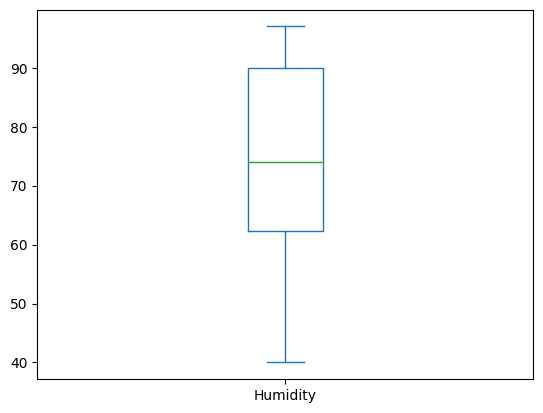

In [ ]:
df['Humidity'].plot.box()

<Axes: >

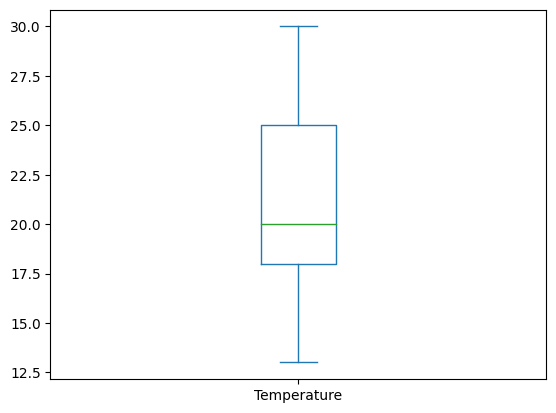

In [ ]:
df['Temperature'].plot.box()

<Axes: ylabel='Density'>

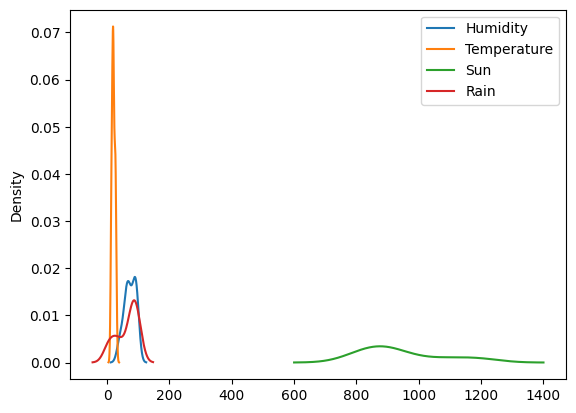

In [ ]:
df.plot.kde()

Bivariate Analysis

In [ ]:
df.corr()

Humidity  Temperature       Sun      Rain
Humidity     1.000000    -0.447835 -0.372005  0.289918
Temperature -0.447835     1.000000  0.279739 -0.432208
Sun         -0.372005     0.279739  1.000000 -0.477893
Rain         0.289918    -0.432208 -0.477893  1.000000

<Axes: >

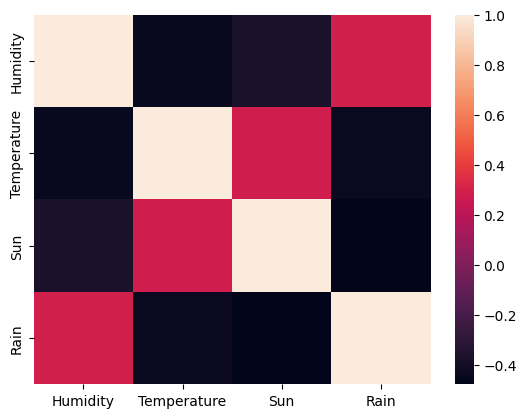

In [ ]:
sns.heatmap(df.corr())

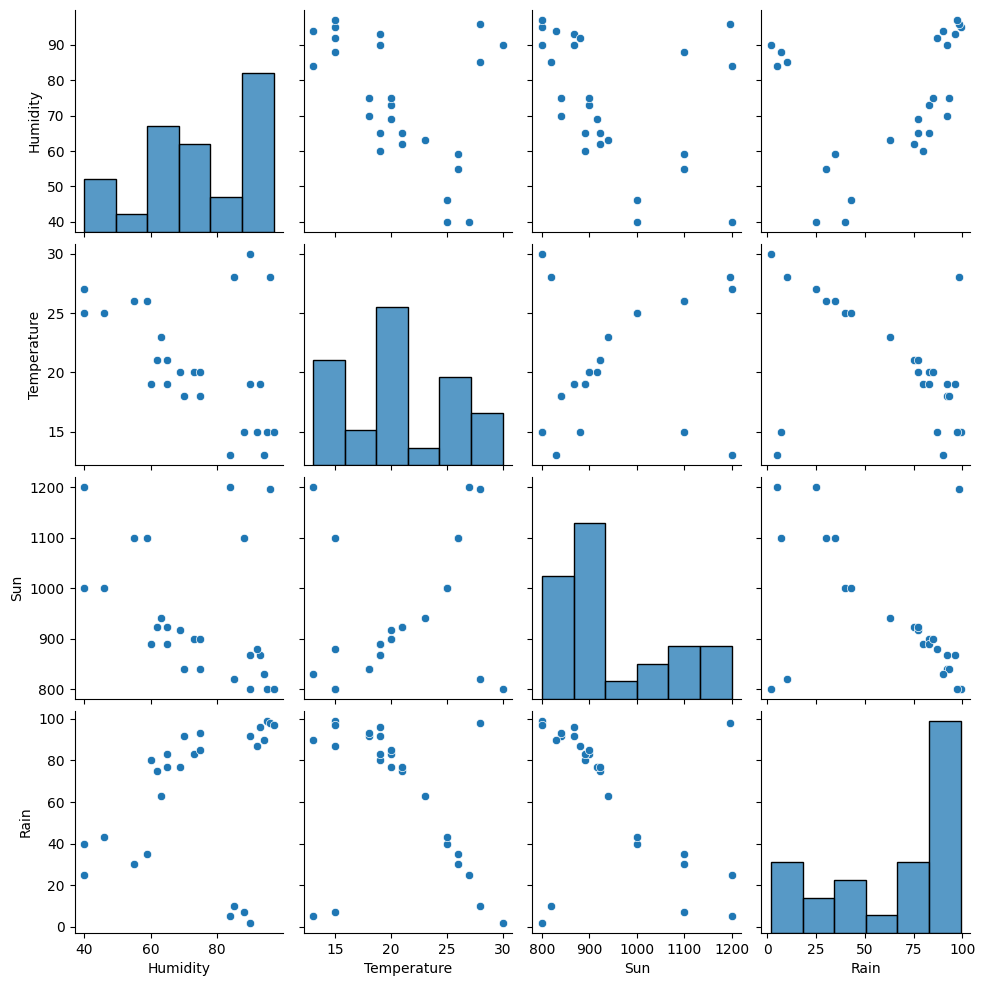

In [ ]:
sns.pairplot(df)

multivariate application of regression

In [ ]:
x=df.iloc[:,0:3]
x.head()

Humidity  Temperature   Sun
0        60           19   890
1        70           18   840
2        40           25  1000
3        62           21   923
4        69           20   916

In [ ]:
y=df['Rain']
y.head()


0    80
1    92
2    40
3    75
4    77
Name: Rain, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 3)
(6, 3)
(20,)
(6,)


Linear Regression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat_train=lr.predict(x_train)
y_hat_test=lr.predict(x_test)

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[ 0.55912538 -5.0362917   0.07763964]
63.71151283429043


In [ ]:
y_train

18    85
20    96
12    10
25    87
4     77
3     75
16    77
14    93
21    97
9     25
15    43
0     80
1     92
10    63
19    35
17    98
6     30
24    90
2     40
13    83
Name: Rain, dtype: int64

In [ ]:
y_hat_train

array([ 74.79575537,  87.33419589,  33.88550467, 107.92955257,
        72.68323728,  64.27654538,  65.95392152,  80.20996056,
       104.51400854,  43.26421619,  41.16362454,  70.66877   ,
        77.41433366,  56.08296119,  51.15992644,  69.22838722,
        48.92342492, 115.23840489,  37.80887226,  73.4643969 ])

In [ ]:
lr.predict(np.array([[60,19,890]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.66877])

Evaluation Of Model

In [ ]:
def eval_model(actual,predict):
  rmse=np.sqrt(mean_squared_error(actual,predict))
  r2=r2_score(actual,predict)
  print("The root mean squared error is ",round(rmse,2))
  print("r2 squared error is ",round(r2,2))

In [ ]:
eval_model(y_train,y_hat_train)

The root mean squared error is  15.05
r2 squared error is  0.69


In [ ]:
eval_model(y_test,y_hat_test)

The root mean squared error is  72.88
r2 squared error is  -1.79
